In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

def least_squares_fit(x_values, y_values):
    n = len(x_values)
    sum_x = sum(x_values)
    sum_y = sum(y_values)

    print("somatorio x dado: ", sum_x)
    print("somatorio y dado: ", sum_y)
    print("Ymedio", sum_y/n)
    sum_x_squared = sum(x ** 2 for x in x_values)
    sum_xy = sum(x * y for x, y in zip(x_values, y_values))
    print("somatorio de Xiˆ2: ", sum_x_squared)
    print("somatorio Xi * Yi: ", sum_xy)
    print("valor do n: ", n)
    # Calculando os coeficientes da linha ajustada (a e b)
    a = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    b = (sum_y - a * sum_x) / n

    # Calculando o coeficiente de determinação (R²)
    y_mean = sum(y_values) / n
    ss_total = sum((y - y_mean) ** 2 for y in y_values)
    ss_res = sum((y - (a * x + b)) ** 2 for x, y in zip(x_values, y_values))
    print("valor do SQT", ss_total)
    print("valor do SQE", ss_res)
    r_squared = 1 - (ss_res / ss_total)

    return a, b, r_squared

def generate_table(x_values, y_values):
    table = []
    n = len(x_values)
    sum_x = sum(x_values)
    sum_y = sum(y_values)
    sum_x_squared = sum(x ** 2 for x in x_values)
    sum_xy = sum(x * y for x, y in zip(x_values, y_values))

    table.append(["i", "xi", "yi", "xi^2", "xi*yi"])
    for i in range(n):
        table.append([i+1, x_values[i], y_values[i], x_values[i]**2, x_values[i]*y_values[i]])

    table.append(["", sum_x, sum_y, sum_x_squared, sum_xy])
    return table


somatorio x dado:  26
somatorio y dado:  79
Ymedio 15.8
somatorio de Xiˆ2:  162
somatorio Xi * Yi:  571
valor do n:  5
valor do SQT 1286.8
valor do SQE 329.1865671641791
Coeficiente angular (a): 5.977611940298507
Coeficiente linear (b): -15.283582089552237
Equação da linha ajustada: y = 5.977611940298507 * x + -15.283582089552237
Coeficiente de determinação (R²): 74.42% 
|   i |   xi |   yi |   xi^2 |   xi*yi |
|----:|-----:|-----:|-------:|--------:|
|   1 |    2 |    1 |      4 |       2 |
|   2 |    3 |    3 |      9 |       9 |
|   3 |    6 |   10 |     36 |      60 |
|   4 |    7 |   20 |     49 |     140 |
|   5 |    8 |   45 |     64 |     360 |


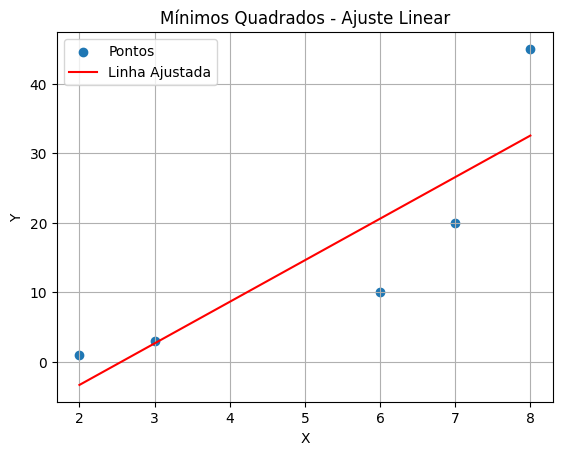

In [4]:
dados = pd.read_csv("../csv/quebrar_senha.csv")

x_values = dados["x"].tolist() 
y_values = dados["y"].tolist()

a, b, r_squared = least_squares_fit(x_values, y_values)
# Imprimindo os valores da linha ajustada e do R²
print("Coeficiente angular (a):", a)
print("Coeficiente linear (b):", b)
print("Equação da linha ajustada: y =", a, "* x +", b)
print(f"Coeficiente de determinação (R²): {round(r_squared * 100, 2)}% ")

# Gerando os pontos da linha ajustada
x_line = np.linspace(min(x_values), max(x_values), 100)
y_line = a * x_line + b

table = generate_table(x_values, y_values)

tabela = pd.DataFrame(table[1:-1], columns=table[0])

print(tabela.to_markdown(index=False))

# Plotando os pontos e a linha ajustada
plt.scatter(x_values, y_values, label='Pontos')
plt.plot(x_line, y_line, color='red', label='Linha Ajustada')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mínimos Quadrados - Ajuste Linear')
plt.legend()
plt.grid(True)

In [14]:
import numpy as np

dados = pd.read_csv("../csv/quebrar_senha.csv")

x_values = dados["x"].tolist() 
y_values = dados["y"].tolist()

# Realizando o ajuste cúbico
coefficients = np.polyfit(x_values, y_values, 1)
p = np.poly1d(coefficients)

# Calculando o R^2
y_mean = np.mean(y_values)
sst = np.sum((y_values - y_mean)**2)
ssr = np.sum((p(x_values) - y_mean)**2)
r_squared = 1 - (ssr / sst)

# Exibindo os resultados
print("Coeficientes do ajuste cúbico:", coefficients)
print("R^2:", r_squared)


Coeficientes do ajuste cúbico: [  5.97761194 -15.28358209]
R^2: 0.2558179726174845
